## Linear Regression

In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

$\theta = (X^{T} \cdot X)^{-1}X^{T} \cdot y $

In [16]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [17]:
theta_best

array([[4.19165492],
       [2.7442156 ]])

In [18]:
X_new = np.array([[0], [2]])

In [19]:
X_new_b = np.c_[np.ones((2, 1)), X_new]

In [20]:
y_predict = X_new_b.dot(theta_best)

In [21]:
y_predict

array([[4.19165492],
       [9.68008611]])

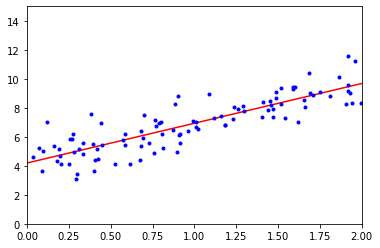

In [27]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
lin_reg = LinearRegression()

In [30]:
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.19165492]), array([[2.7442156]]))

In [31]:
lin_reg.predict(X_new)

array([[4.19165492],
       [9.68008611]])

In [32]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)

In [33]:
theta_best_svd

array([[4.19165492],
       [2.7442156 ]])

In [34]:
# Directly
np.linalg.pinv(X_b).dot(y)

array([[4.19165492],
       [2.7442156 ]])

Complexity:
* The Normal Equation computes the inverse of X X, which is an (n + 1) × (n + 1) matrix (where n is the number of features). The computational complexity of inverting such a matrix is typically about $O(n^{2.4})$ to $O(n^{3})$.
* The SVD approach used by Scikit-Learn’s LinearRegression class is about $O(n^{2})$.

## Gradient Descent

To implement Gradient Descent, you need to compute the gradient of the
cost function with regard to each model parameter $θ_j$.

In [35]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2,1) # random initialization
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [36]:
theta

array([[4.19165492],
       [2.7442156 ]])

### Stochastic Gradient Descent

* Stochastic Gradient Descent picks a random instance in the training set at every step and computes the gradients based only on that single instance.
* When the cost function is very irregular (as in Figure 4-6), this can actually help the algorithm jump out of local minima, so Stochastic Gradient Descent has a better chance of finding the global minimum than Batch Gradient Descent does.
* Therefore, randomness is good to escape from local optima, but bad because it means that the algorithm can never settle at the minimum. One solution to this dilemma is to gradually reduce the learning rate.
* This process is akin to simulated annealing, an algorithm inspired from the process in metallurgy of annealing, where molten metal is slowly cooled down. The function that determines the learning rate at each iteration is called the learning schedule.

In [37]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters
def learning_schedule(t):
    return t0 / (t + t1)

In [38]:
theta = np.random.randn(2,1) # random initialization

In [40]:
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [41]:
theta

array([[4.16200077],
       [2.76259618]])

In [46]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [47]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.08995746]), array([2.67997151]))

## Polynomial Regression

In [48]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [50]:
# Scikit-Learn’s PolynomialFeatures class to transform our training data
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [51]:
X[0], X_poly[0]

(array([-0.34397983]), array([-0.34397983,  0.11832212]))

In [52]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.11044621]), array([[0.97588168, 0.52664567]]))

In [55]:
y_predict = lin_reg.predict(X_poly)

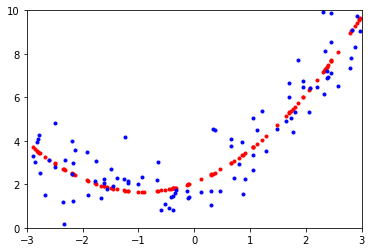

In [67]:
plt.plot(X, y_predict, "r.")
plt.plot(X, y, "b.")
plt.axis([-3, 3, 0, 10])
plt.show()

### Learning Curve
- These are plots of the model’s performance on the training set and the validation set as a function of the training set size (or the training iteration).

In [68]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [86]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m],
                                               y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
        plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
        plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

Text(0, 0.5, 'RMSE')

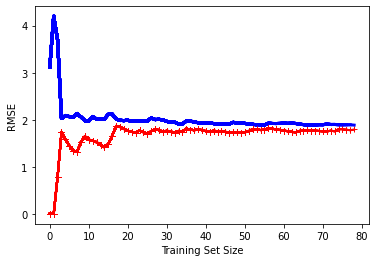

In [87]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.xlabel('Training Set Size')
plt.ylabel('RMSE')

(0.0, 80.0, 0.0, 3.0)

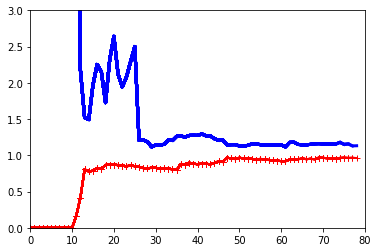

In [92]:
# learning curves of a 10th-degree polynomial model
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([("poly_features", 
                                   PolynomialFeatures(degree=10,
                                                      include_bias=False)),
                                  ("lin_reg", LinearRegression()),])
plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])

## Regularized Linear Models

### Ridge Regression/ Tikhonov regularization
regularization term $= \alpha \Sigma^{n}_{i=1} \theta^2_i$

In [93]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[5.44708379]])

In [94]:
# Stochastic Gradient Descent
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([5.42175582])

### Lasso Regression
regularization term $= \alpha \Sigma^{n}_{i=1} |\theta_i|$

In [96]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([5.40952908])

## Logistic Regression

In [97]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [98]:
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int) # 1 if Iris virginica, else 0

In [99]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

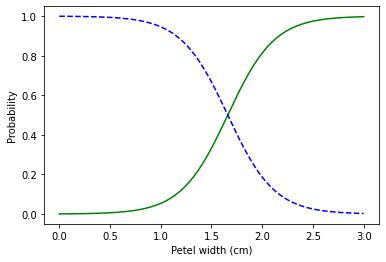

In [101]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")
plt.xlabel('Petel width (cm)')
plt.ylabel('Probability')
plt.show()

In [102]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

In [106]:
X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"]
softmax_reg = LogisticRegression(multi_class="multinomial",
                                 solver="lbfgs",C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [107]:
softmax_reg.predict([[5, 2]])
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])